https://www.kaggle.com/code/serkanpeldek/face-recognition-on-olivetti-dataset <br>
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

In [939]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [940]:
faces = datasets.fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [941]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [942]:
faces.target[0], faces.target[0].shape

(0, ())

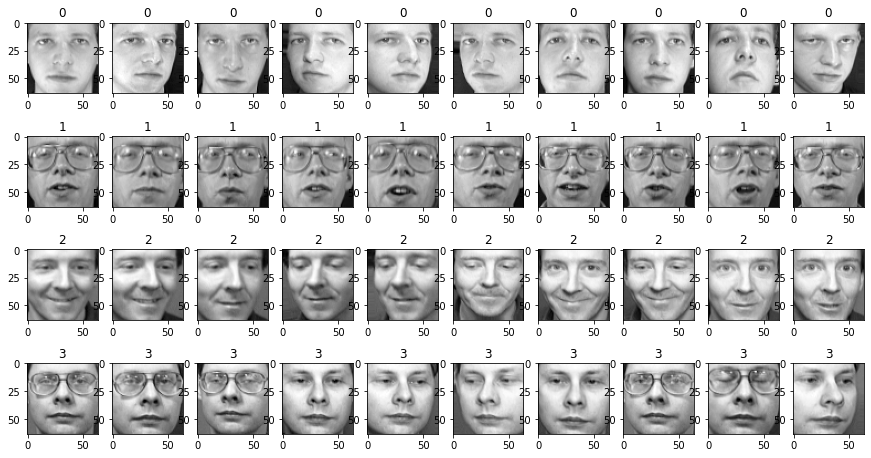

In [943]:
# plot faces related to image with target 0 in a grid
fig, axes = plt.subplots(4, 10, figsize=(15, 8))
for target, image, ax in zip(faces.target, faces.images, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(target)


# getting images of a new person

In [944]:
import cv2
import os

In [967]:
#create a function that gets the video_path and store the frames in a given folder path
def video_to_frames(video_path, frames_path):
    cam = cv2.VideoCapture(video_path)
    try:
        # creating a folder named data
        if not os.path.exists(frames_path):
            os.makedirs(frames_path)
        
    # if not created then raise error
    except OSError:
        print ('Error: Creating directory of data')
    
    # frame
    currentframe = 62
    
    # skip index
    skip_index = 0
    while(True):
        # reading from frame
        ret,frame = cam.read()
        
        if ret:
            if skip_index == 3:
                skip_index = 0
                
                # if video is still left continue creating images
                name = frames_path + '/frame' + str(currentframe) + '.jpg'
                print ('Creating...' + name)
                
                # writing the extracted images
                cv2.imwrite(name, frame)
                
                # increasing counter so that it will
                # show how many frames are created
                currentframe += 1
            skip_index += 1
        else:
            break
    
    # Release all space and windows once done
    cam.release()
    cv2.destroyAllWindows()

video_path = "/home/ubuntu/projects/warmup/final_project/dani2.MOV"
frames_path = "/home/ubuntu/projects/warmup/final_project/data"

video_to_frames(video_path, frames_path)

Creating.../home/ubuntu/projects/warmup/final_project/data/frame62.jpg
Creating.../home/ubuntu/projects/warmup/final_project/data/frame63.jpg
Creating.../home/ubuntu/projects/warmup/final_project/data/frame64.jpg
Creating.../home/ubuntu/projects/warmup/final_project/data/frame65.jpg
Creating.../home/ubuntu/projects/warmup/final_project/data/frame66.jpg
Creating.../home/ubuntu/projects/warmup/final_project/data/frame67.jpg
Creating.../home/ubuntu/projects/warmup/final_project/data/frame68.jpg
Creating.../home/ubuntu/projects/warmup/final_project/data/frame69.jpg
Creating.../home/ubuntu/projects/warmup/final_project/data/frame70.jpg
Creating.../home/ubuntu/projects/warmup/final_project/data/frame71.jpg
Creating.../home/ubuntu/projects/warmup/final_project/data/frame72.jpg
Creating.../home/ubuntu/projects/warmup/final_project/data/frame73.jpg
Creating.../home/ubuntu/projects/warmup/final_project/data/frame74.jpg
Creating.../home/ubuntu/projects/warmup/final_project/data/frame75.jpg
Creati

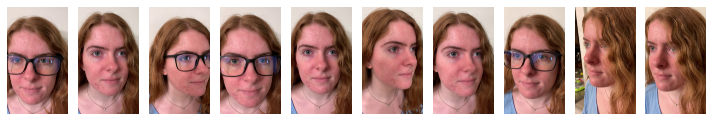

In [968]:
# before applying the image converstion
# showgrid 9 random images from folder data
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def showgrid(path, n, cmap=None):
    random_images = random.sample(os.listdir(path), n)
    plt.figure(figsize=(10,10))
    for i in range(n):
        plt.subplot(1,n,i+1)
        img = mpimg.imread(os.path.join(path, random_images[i]))
        if cmap != None:
            plt.imshow(img, cmap=cmap)
        else:
            plt.imshow(img)
        plt.axis('off')
        plt.tight_layout()
    plt.show()

showgrid("/home/ubuntu/projects/warmup/final_project/data", 10)

In [969]:
# transform a new image to the format of dataset using Image module and convert to images to to between zero and one
from PIL import Image
import numpy as np

def image_converter(path):
    new_face = Image.open(path)
    new_face = new_face.resize((64, 64))
    new_face = new_face.convert('L')
    new_face = np.array(new_face)
    new_face = new_face.astype('float32')
    new_face /= 255
    return new_face

# new_face = image_converter('/home/ubuntu/projects/warmup/final_project/ali.jpg')
# plt.imshow(new_face, cmap='gray')


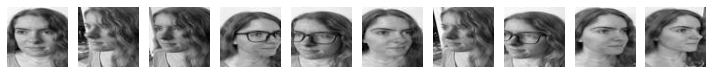

In [974]:
# applying a function to all images in a folder
def transform_images(path, dest_path):
    for file in os.listdir(path):
        newImage = image_converter(path + '/' + file)
        newImage = Image.fromarray(np.uint8(newImage*255))
        try:
            # creating a folder named data
            if not os.path.exists(dest_path):
                os.makedirs(dest_path)
            
        # if not created then raise error
        except OSError:
            print ('Error: Creating directory of data')
        newImage.save(dest_path + '/' + file)

src_path = '/home/ubuntu/projects/warmup/final_project/data'
dst_path = '/home/ubuntu/projects/warmup/final_project/transform_data'
transform_images(src_path, dst_path)
showgrid(dst_path, 10, cmap='gray')

# applying conventional machine learing for face recognition

## reducing dimentionality

In [975]:
# reading images from a folder and storing them in a list and then converting the list to an array and add to dataset
def read_images(path):
    images = []
    for file in os.listdir(path):
        images.append(image_converter(path + '/' + file).flatten())
    return np.array(images)

# read_images('/home/ubuntu/projects/warmup/final_project/data').shape

# add new images to dataset
def add_new_images(path):
    new_images = read_images(path)
    new_target = np.ones(new_images.shape[0]) * 40
    faces.data = np.concatenate((faces.data, new_images))
    faces.target = np.concatenate((faces.target, new_target))
    faces.DESCR = 'images of danielle'

add_new_images(dst_path)


In [976]:
#train test split faces dataset
from sklearn.model_selection import train_test_split
X = faces.data
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((405, 4096), (102, 4096), (405,), (102,))

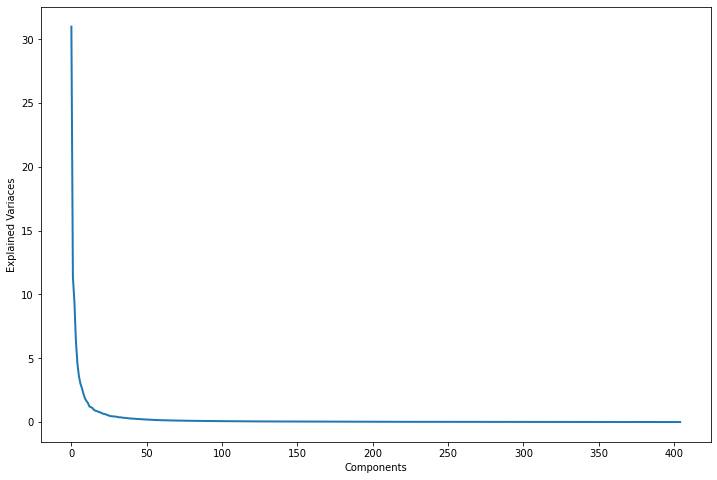

In [977]:
#applying pca to x_train and x_test for dimensionality reduction, preserving 95% of the variance
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [978]:
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((405, 105), (102, 105))

## applying different models

In [979]:
#applying svm to the dataset
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC()
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_test_pca)
accuracy_score(y_test, y_pred)


0.9509803921568627

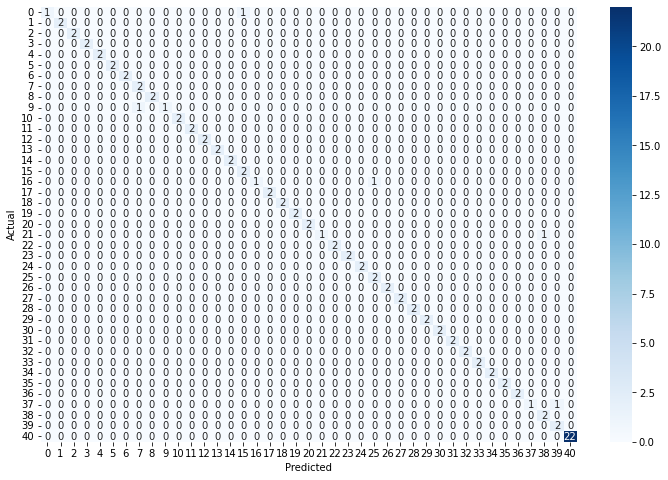

In [980]:
# HEATMAP OF CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [981]:
# applying gaussian naive bayes to the dataset
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
y_pred = gnb.predict(X_test_pca)
accuracy_score(y_test, y_pred)


0.9019607843137255

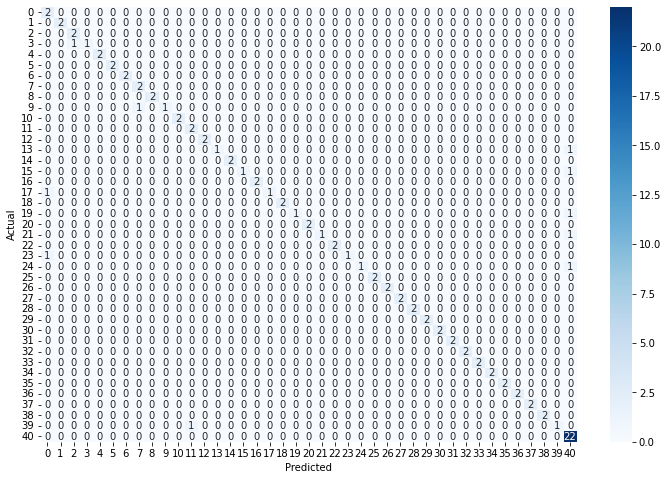

In [982]:
# HEATMAP OF CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# issues

- what if the number of samples per class are limited. 
- what if the number of classes are much larger than the samples per class 
- closed-set classification assumes that all classes are known and the goal is to classify new examples into one of these predefined classes, while open-set classification allows for the possibility of encountering new classes that were not present in the training data. face recognition is an open-set classification by essence. However, our solution is a close-set classification

## limited number of samples per class

In [983]:
# select k samples from each class and form a new dataset with that k selected samples per each class
def select_k_samples_per_class(X_train_pca, y_train, k):
    num_classes = len(np.unique(y_train))
    X_train_pca_new = np.empty((0, X_train_pca.shape[1]))
    y_train_new = np.empty((0))
    for class_id in range(num_classes):
        X_train_pca_sub = X_train_pca[y_train==class_id][:k]
        y_train_sub = y_train[y_train==class_id][:k]
        X_train_pca_new = np.concatenate((X_train_pca_new, X_train_pca_sub))
        y_train_new = np.concatenate((y_train_new, y_train_sub))
    return X_train_pca_new, y_train_new

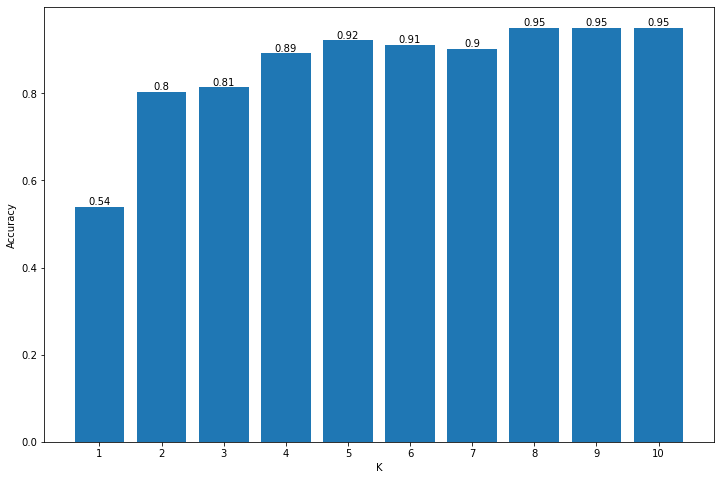

In [984]:
# ploting accuracy vs k
acc = []
ks = []
for k in range(1, 11):
    X_train_pca_new, y_train_new = select_k_samples_per_class(X_train_pca, y_train, k)
    svm = SVC()
    svm.fit(X_train_pca_new, y_train_new)
    y_pred = svm.predict(X_test_pca)
    acc.append(accuracy_score(y_test, y_pred))
    ks.append(k)

plt.figure(figsize=(12,8))
plt.bar(ks, acc, linewidth=2)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 11, 1))

for i in range(len(ks)):
    plt.text(ks[i], acc[i], round(acc[i], 2), ha='center', va='bottom')

plt.show()

## open-set vs close-set example

let see one example of the close-set problem of the existing classes

Actual:  34.0
Predicted:  [34.]


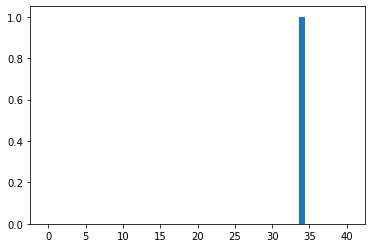

In [996]:
#randomly select a sample from the test set and predict the class
import random

random_index = random.randint(0, X_test_pca.shape[0])
random_sample = X_test_pca[random_index]
random_sample = random_sample.reshape(1, -1)
random_target = y_test[random_index]
random_pred =   gnb.predict(random_sample)
print('Actual: ', random_target)
print('Predicted: ', random_pred)

prd_prob = gnb.predict_proba(random_sample)
plt.bar(np.arange(0, 41, 1), prd_prob[0], linewidth=2)
plt.show()


let see one example of the close-set problem of the existing classes

[40.]


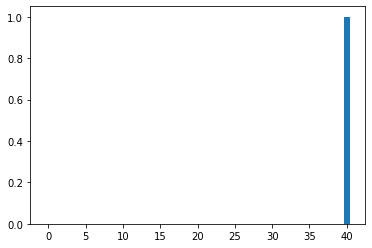

In [998]:
new_face = image_converter('/home/ubuntu/projects/warmup/final_project/openset.jpeg')
new_face = new_face.reshape(1, -1)
new_face_pca = pca.transform(new_face)
new_face_pca.shape
prd = gnb.predict(new_face_pca)
print(prd)
prd_prob = gnb.predict_proba(new_face_pca)
plt.bar(np.arange(0, 41, 1), prd_prob[0], linewidth=2)
plt.show()

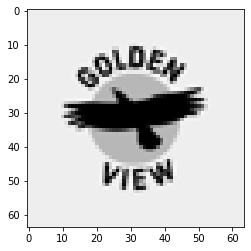

In [999]:
plt.imshow(new_face.reshape(64, 64), cmap='gray')

This clearly isn't a face, so how is it possible that our model detected it as class 7 with such high confidence? This is the open-set problem that I mentioned before. The model's assumption is that its inputs will always fall within the classes it was trained against. As a result, the model selects the most similar class to its input, <mark>regardless</mark> of whether or not the input actually belongs to one of its classes.

# experience with larger dataset and different models

In [1000]:
# dowloading lfw dataset
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html
from sklearn.datasets import fetch_lfw_people

In [1051]:
lfw = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
lfw.DESCR = 'images of people'



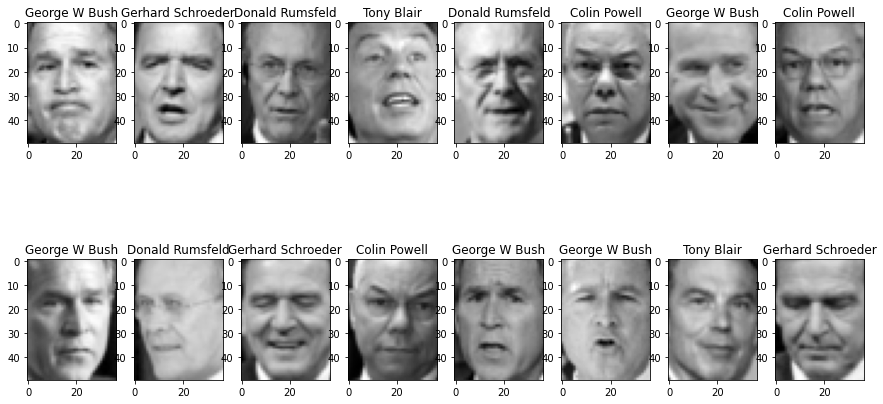

In [1054]:
fig, axes = plt.subplots(2, 8, figsize=(15, 8))
for target, image, ax in zip(lfw.target, lfw.images, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(lfw.target_names[target])
plt.show()

In [1003]:
def lfw_image_converter(path):
    new_face = Image.open(path)
    new_face = new_face.resize((37, 50))
    new_face = new_face.convert('L')
    new_face = np.array(new_face)
    new_face = new_face.astype('float32')
    return new_face

In [1004]:
# reading images from a folder and storing them in a list and then converting the list to an array and add to dataset
def read_images(path):
    images = []
    for file in os.listdir(path):
        images.append(lfw_image_converter(path + '/' + file).flatten())
    return np.array(images)

# read_images('/home/ubuntu/projects/warmup/final_project/data').shape

# add new images to dataset
def add_new_images(path):
    new_images = read_images(path)
    new_target = np.ones(new_images.shape[0]) * len(np.unique(lfw.target))
    lfw.data = np.concatenate((lfw.data, new_images))
    lfw.target = np.concatenate((lfw.target, new_target))
    lfw.DESCR = 'images of danielle'

add_new_images('/home/ubuntu/projects/warmup/final_project/data')

In [1005]:
X = lfw.data
y = lfw.target
X.shape, y.shape

((1247, 1850), (1247,))

In [1006]:
labels, samples_per_class = np.unique(y, return_counts=True)
min(samples_per_class), len(np.unique(labels))

(107, 6)

In [1007]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((997, 1850), (250, 1850), (997,), (250,))

In [1008]:
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((997, 126), (250, 126))

In [1009]:
#applying svm to the dataset
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


min_faces_per_person:  5 accuracy:  0.24644945697577275
min_faces_per_person:  10 accuracy:  0.34566473988439306
min_faces_per_person:  15 accuracy:  0.3991655076495132
min_faces_per_person:  20 accuracy:  0.4462809917355372
min_faces_per_person:  25 accuracy:  0.4613899613899614
min_faces_per_person:  30 accuracy:  0.5654008438818565
min_faces_per_person:  35 accuracy:  0.6034063260340633
min_faces_per_person:  40 accuracy:  0.6497326203208557
min_faces_per_person:  45 accuracy:  0.6686746987951807
min_faces_per_person:  50 accuracy:  0.6955128205128205
min_faces_per_person:  55 accuracy:  0.7508896797153025
min_faces_per_person:  60 accuracy:  0.7444444444444445
min_faces_per_person:  65 accuracy:  0.7286821705426356
min_faces_per_person:  70 accuracy:  0.7286821705426356
min_faces_per_person:  75 accuracy:  0.7950819672131147
min_faces_per_person:  80 accuracy:  0.8114035087719298
min_faces_per_person:  85 accuracy:  0.8114035087719298
min_faces_per_person:  90 accuracy:  0.81140350

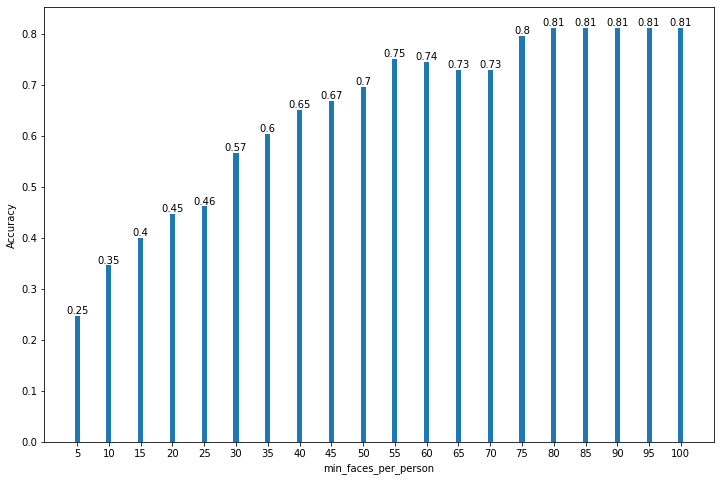

In [1010]:
# swip min_faces_per_person from 10 to 100 and see the accuracy
from sklearn.datasets import fetch_lfw_people

acc = []
min_faces_per_persons = []
num_classes = []
for min_faces_per_person in range(5, 101, 5):
    lfw = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=0.4)
    lfw.DESCR = 'images of people'
    X = lfw.data
    y = lfw.target
    X.shape, y.shape

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape

    pca = PCA(n_components=0.95)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_train_pca.shape, X_test_pca.shape

    svm = SVC()
    svm.fit(X_train_pca, y_train)
    y_pred = svm.predict(X_test_pca)
    print('min_faces_per_person: ', min_faces_per_person, 'accuracy: ', accuracy_score(y_test, y_pred))

    num_classes.append(len(np.unique(y)))
    min_faces_per_persons.append(min_faces_per_person)
    acc.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(12,8))
plt.bar(min_faces_per_persons, acc, linewidth=2)
plt.xlabel('min_faces_per_person')
plt.ylabel('Accuracy')
plt.xticks(np.arange(5, 101, 5))

for i in range(len(min_faces_per_persons)):
    plt.text(min_faces_per_persons[i], acc[i], round(acc[i], 2), ha='center', va='bottom')



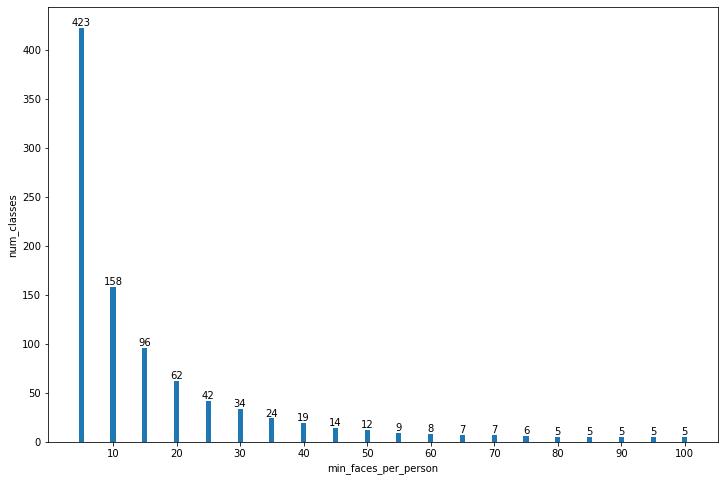

In [1011]:
plt.figure(figsize=(12,8))
plt.bar(min_faces_per_persons, num_classes, linewidth=2)
plt.xlabel('min_faces_per_person')
plt.ylabel('num_classes')
plt.xticks(np.arange(10, 101, 10))

for i in range(len(min_faces_per_persons)):
    plt.text(min_faces_per_persons[i], num_classes[i], round(num_classes[i], 2), ha='center', va='bottom')

In [1012]:
lfw = fetch_lfw_people(min_faces_per_person=75, resize=0.4)
lfw.DESCR = 'images of people'
add_new_images('/home/ubuntu/projects/warmup/final_project/data')
X = lfw.data
y = lfw.target
X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

svm = SVC(probability=True)
svm.fit(X_train_pca, y_train)


SVC(probability=True)

Actual:  3.0
Predicted:  [3.]


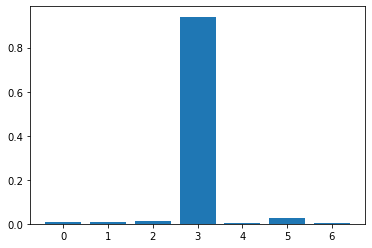

In [1013]:
random_index = random.randint(0, X_test_pca.shape[0])
random_sample = X_test_pca[random_index]
random_sample = random_sample.reshape(1, -1)
random_target = y_test[random_index]
random_pred =   svm.predict(random_sample)
print('Actual: ', random_target)
print('Predicted: ', random_pred)

prd_prob = svm.predict_proba(random_sample)
plt.bar(np.arange(0, len(np.unique(lfw.target)), 1), prd_prob[0], linewidth=2)
plt.show()

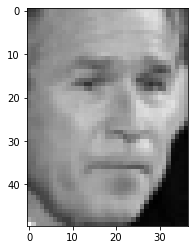

In [1015]:
#imshow one of the images of the class 6
plt.imshow(X[y==3][0].reshape(50, 37), cmap='gray')


[3.]


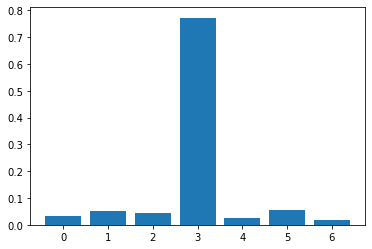

In [1016]:
new_face = lfw_image_converter('/home/ubuntu/projects/warmup/final_project/openset.jpeg')
new_face = new_face.reshape(1, -1)
new_face_pca = pca.transform(new_face)
new_face_pca.shape
prd = svm.predict(new_face_pca)
print(prd)
prd_prob = svm.predict_proba(new_face_pca)
plt.bar(np.arange(0, len(np.unique(lfw.target)), 1), prd_prob[0], linewidth=2)
plt.show()

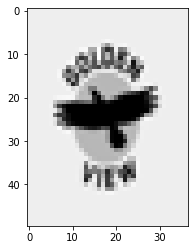

In [1017]:
plt.imshow(new_face.reshape(50, 37), cmap='gray')

# using convolutional neural network models

In [1019]:
# defining a Dataset class on top of lfw dataset
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

class LFWDataset(Dataset):
    def __init__(self, min_faces_per_person , transform=None):
        self.lfw = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=0.4)
        self.X = self.lfw.images[:,np.newaxis,:,:]
        self.y = self.lfw.target
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        image = self.X[idx]
        label = self.y[idx]
        if self.transform:
            image = self.transform(image)
        return image, label
    
    @staticmethod
    def lfw_image_converter(path):
        new_face = Image.open(path)
        new_face = new_face.resize((37, 50))
        new_face = new_face.convert('L')
        new_face = np.array(new_face)
        new_face = new_face.astype('float32')
        return new_face
    
    #reading all the images in a folder and apply the converter func
    def read_images(self, path):
        images = []
        for file in os.listdir(path):
            if file.endswith('.jpg'):
                images.append(LFWDataset.lfw_image_converter(path + file))
        return np.array(images)
    
    #adding images of a new person to the dataset
    def add_new_images(self, path, min_faces_per_person=70):
        new_images = self.read_images(path)
        
        new_images_ = new_images[:min(len(new_images), min_faces_per_person),:] 
        # print(new_images_.shape)
        new_target = np.ones(new_images_.shape[0]) * len(np.unique(self.y))
        self.X = np.concatenate((self.X, new_images_[:,np.newaxis,:,:]))
        self.y = np.concatenate((self.y, new_target))
        
    def __str__(self):
        desc = f"data shape: {self.X.shape}\nnum classes: {len(np.unique(self.y))}\n"
        return desc

In [1020]:
lfw_ds = LFWDataset(min_faces_per_person=75)
print(lfw_ds)

data shape: (1217, 1, 50, 37)
num classes: 6



In [1021]:
lfw_ds.add_new_images('/home/ubuntu/projects/warmup/final_project/data/')
print(lfw_ds)

data shape: (1287, 1, 50, 37)
num classes: 7



In [1023]:
# define a 5 layer cnn model that takes 50x37 images as input
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, num_classes=7):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        
        self.fc1 = nn.Linear(128 * 3 * 2, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, num_classes)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv4(x)))
        x = self.dropout(x)
        
        x = x.view(-1, 128 * 3 * 2)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        
        x = self.fc4(x)
        
        return x

In [1056]:
print(CNN())

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=768, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=7, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [1024]:
print(lfw_ds)

data shape: (1287, 1, 50, 37)
num classes: 7



In [1025]:
# define a function to train the model in a contrastive way
#sklearn for calculating accuracy
from sklearn.metrics import accuracy_score

def train(model, train_loader, criterion, optimizer, epochs=10, device='cpu'):
    model.to(device)
    model.train()
    accuracy = []
    losses = []
    for epoch in range(epochs):
        lbls = []
        preds = []
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.type(torch.LongTensor).to(device)
            optimizer.zero_grad()
            output = model(images)
            lbls.append(labels)
            preds.append(output)
            # print(output.shape, labels.shape)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0)
        train_loss = train_loss / len(train_loader.dataset)
        accuracy.append(accuracy_score(torch.cat(lbls).cpu(), torch.cat(preds).cpu().argmax(1)))
        losses.append(train_loss)
    return accuracy, losses

# define a function to test the model
def test(model, test_loader, criterion, device='cpu'):
    model.to(device)
    model.eval()
    test_loss = 0.0
    correct = 0
    lbls = []
    preds = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.type(torch.LongTensor).to(device)
            output = model(images)
            lbls.append(labels)
            preds.append(output)
            loss = criterion(output, labels)
            test_loss += loss.item() * images.size(0)
            _, pred = torch.max(output, 1)
            correct += (pred == labels).sum().item()
    test_loss = test_loss / len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.6f}\tTest Accuracy: {correct}/{len(test_loader.dataset)} ({100 * correct / len(test_loader.dataset):.2f}%)')
    return lbls, preds

# define a function to predict the class of a new image
def predict(model, image, device='cpu'):
    model.to(device)
    model.eval()
    with torch.no_grad():
        image = image.to(device)
        output = model(image)
        output = F.softmax(output, 1)
        _, pred = torch.max(output, 1)
    return pred.item(), output

# split the lfw_ds to train and test sets using torch and define the train and test loaders
from torch.utils.data import random_split

lfw_ds = LFWDataset(min_faces_per_person=75)
lfw_ds.add_new_images('/home/ubuntu/projects/warmup/final_project/data/')
print(lfw_ds)
train_ds, test_ds = random_split(lfw_ds, [int(0.8 * len(lfw_ds)), len(lfw_ds)-int(0.8 * len(lfw_ds))])

# define model, train_loader, criterion, optimizer, epochs=10, device='cpu'
model = CNN(num_classes=len(np.unique(lfw_ds.y)))
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 50
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# train the model
epochs_acc, epoch_loss = train(model, train_loader, criterion, optimizer, epochs, device)

# define the test loader and test the model
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=64, shuffle=False)
lbls_test, preds_test = test(model, train_loader, criterion, device)


data shape: (1287, 1, 50, 37)
num classes: 7

Test Loss: 0.047609	Test Accuracy: 1021/1029 (99.22%)


Text(0.5, 0, 'Epoch')

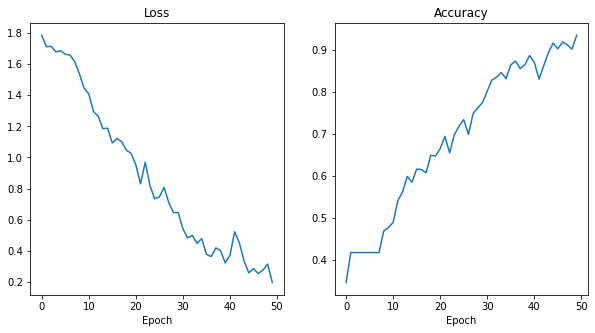

In [1026]:
# turn llb_test and preds_test into numpy arrays
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epoch_loss)
axes[0].set_title('Loss')
axes[0].set_xlabel('Epoch')
axes[1].plot(epochs_acc)
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')

In [1027]:
len(lbls_test), len(preds_test)

(17, 17)

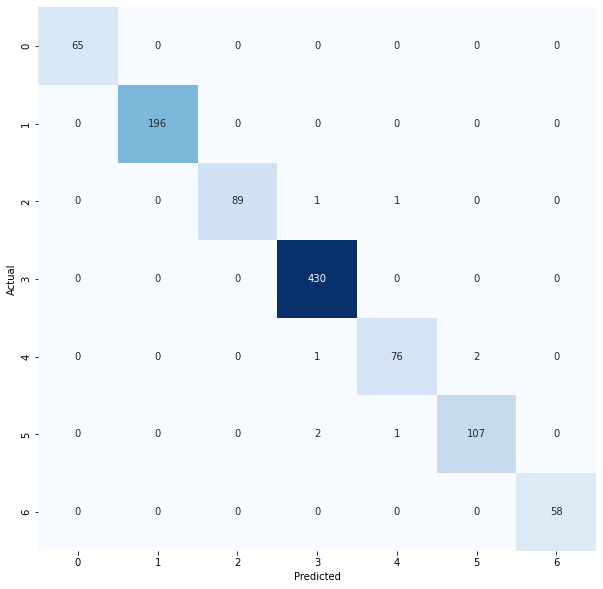

In [1028]:
# turn llb_test and preds_test into numpy arrays
lbls_test = torch.cat(lbls_test, dim=0).cpu().numpy()
preds_test = torch.cat(preds_test, dim=0).cpu().numpy().argmax(1)
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(lbls_test, preds_test)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1029]:
# print the shape of train loader
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)


torch.Size([64, 1, 50, 37])
torch.Size([64])


## evaluation on chagning the cardiality of classes

In [1031]:
accuracy_per_num_of_classes = []
for min_faces_per_person in range(5, 101, 5):
    lfw_ds = LFWDataset(min_faces_per_person=min_faces_per_person)
    lfw_ds.add_new_images('/home/ubuntu/projects/warmup/final_project/data/')
    print(f'Number of classes: {len(np.unique(lfw_ds.y))}')
    print(f'Number of images: {len(lfw_ds)}')

    train_ds, test_ds = random_split(lfw_ds, [int(0.8 * len(lfw_ds)), len(lfw_ds)-int(0.8 * len(lfw_ds))])

    # define model, train_loader, criterion, optimizer, epochs=10, device='cpu'
    model = CNN(num_classes=len(np.unique(lfw_ds.y)))
    train_loader = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    epochs = 50
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # train the model
    epochs_acc, epoch_loss = train(model, train_loader, criterion, optimizer, epochs, device)

    # define the test loader and test the model
    test_loader = torch.utils.data.DataLoader(test_ds, batch_size=64, shuffle=False)
    lbls_test, preds_test = test(model, train_loader, criterion, device)

    accuracy_per_num_of_classes.append(accuracy_score(torch.cat(lbls_test).cpu(), torch.cat(preds_test).cpu().argmax(1)))


Number of classes: 424
Number of images: 6055
Test Loss: 1.543473	Test Accuracy: 3133/4844 (64.68%)
Number of classes: 159
Number of images: 4394
Test Loss: 0.655239	Test Accuracy: 2942/3515 (83.70%)
Number of classes: 97
Number of images: 3665
Test Loss: 0.225007	Test Accuracy: 2793/2932 (95.26%)
Number of classes: 63
Number of images: 3093
Test Loss: 0.114516	Test Accuracy: 2428/2474 (98.14%)
Number of classes: 43
Number of images: 2658
Test Loss: 0.163451	Test Accuracy: 2056/2126 (96.71%)
Number of classes: 35
Number of images: 2440
Test Loss: 0.065096	Test Accuracy: 1926/1952 (98.67%)
Number of classes: 25
Number of images: 2123
Test Loss: 0.095177	Test Accuracy: 1662/1698 (97.88%)
Number of classes: 20
Number of images: 1937
Test Loss: 0.028326	Test Accuracy: 1542/1549 (99.55%)
Number of classes: 15
Number of images: 1727
Test Loss: 0.020098	Test Accuracy: 1380/1381 (99.93%)
Number of classes: 13
Number of images: 1630
Test Loss: 0.023128	Test Accuracy: 1297/1304 (99.46%)
Number o

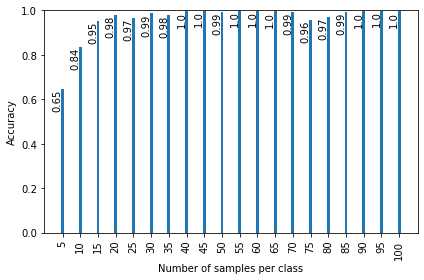

In [1032]:
# some of bars value are not visible, so we can use plt.tight_layout() to fix it
plt.bar(range(5, 101, 5), accuracy_per_num_of_classes)
plt.xticks(range(5, 101, 5), range(5, 101, 5), rotation=90)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Number of samples per class')
for i in range(5, 101, 5):
    plt.text(i, accuracy_per_num_of_classes[i//5-1], round(accuracy_per_num_of_classes[i//5-1], 2), rotation=90, ha='right', va='top')
plt.tight_layout()
plt.show()

## training in a contrastive fashion

In [1033]:
# defining a Dataset class on top of lfw dataset
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

class LFWDataset(Dataset):
    def __init__(self, min_faces_per_person , transform=None):
        self.min_faces_per_person = min_faces_per_person
        self.lfw = fetch_lfw_people(min_faces_per_person=self.min_faces_per_person, resize=0.4)
        X = self.lfw.images[:,np.newaxis,:,:]
        y = self.lfw.target

        #balance the dataset
        self.X, self.y = self.balance_dataset(X, y)
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        #defining anchor, positive and negative images
        anc_image = self.X[idx]
        anc_label = self.y[idx]

        pos_idx = np.random.choice(np.where(self.y == anc_label)[0])
        pos_image = self.X[pos_idx]
        pos_label = self.y[pos_idx]

        neg_idx = np.random.choice(np.where(self.y != anc_label)[0])
        neg_image = self.X[neg_idx]
        neg_label = self.y[neg_idx]

        if self.transform:
            anc_image = self.transform(anc_image)
            pos_image = self.transform(pos_image)
            neg_image = self.transform(neg_image)

        return anc_image, pos_image, neg_image, anc_label, pos_label, neg_label
    
    #balancing the dataset
    def balance_dataset(self, X, y):
        classes, counts = np.unique(y, return_counts=True)
        min_count = np.min(counts)
        X_new = np.zeros((min_count * len(classes), X.shape[1], X.shape[2], X.shape[3]))
        y_new = np.zeros(min_count * len(classes))
        for i, c in enumerate(classes):
            X_new[i*min_count:(i+1)*min_count] = X[y == c][np.random.choice(counts[i], min_count)]
            y_new[i*min_count:(i+1)*min_count] = y[y == c][np.random.choice(counts[i], min_count)]
        return X_new, y_new

    @staticmethod
    def lfw_image_converter(path):
        new_face = Image.open(path)
        new_face = new_face.resize((37, 50))
        new_face = new_face.convert('L')
        new_face = np.array(new_face)
        new_face = new_face.astype('float32')
        return new_face
    
    #reading all the images in a folder and apply the converter func
    def read_images(self, path):
        images = []
        for file in os.listdir(path):
            if file.endswith('.jpg'):
                images.append(LFWDataset.lfw_image_converter(path + file))
        return np.array(images)
    
    #adding images of a new person to the dataset
    def add_new_images(self, path):
        new_images = self.read_images(path)
        
        new_images_ = new_images[:min(len(new_images), self.min_faces_per_person),:] 
        # print(new_images_.shape)
        new_target = np.ones(new_images_.shape[0]) * len(np.unique(self.y))
        self.X = np.concatenate((self.X, new_images_[:,np.newaxis,:,:]))
        self.y = np.concatenate((self.y, new_target))
        
    def __str__(self):
        desc = f"data shape: {self.X.shape}\nnum classes: {len(np.unique(self.y))}\n"
        return desc

In [1034]:
lfw_ds = LFWDataset(min_faces_per_person=75)
# lfw_ds[0]

In [1035]:
# define a 5 layer cnn model that takes 50x37 images as input
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, num_classes=7):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        
        self.fc1 = nn.Linear(128 * 3 * 2, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, num_classes)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        # x = self.dropout(x)
        x = self.pool(F.relu(self.conv2(x)))
        # x = self.dropout(x)
        x = self.pool(F.relu(self.conv3(x)))
        # x = self.dropout(x)
        x = self.pool(F.relu(self.conv4(x)))
        # x = self.dropout(x)
        
        x = x.view(-1, 128 * 3 * 2)
        
        x = F.relu(self.fc1(x))
        # x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        
        x = self.fc4(x)
        
        return x
    


In [1036]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm
#import module for cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

def train(model, train_loader, criterion, optimizer, epochs=10, device='cpu'):
    model.to(device)
    model.train()
    accuracy = []
    losses = []
    #uing tqdm to show the progress bar
    for epoch in tqdm(range(epochs)):
        # set the optimizer learning rate to half every 10 epochs
        if epoch % (epochs//4) == 0:
            for param_group in optimizer.param_groups:
                param_group["lr"] /= 2
    
    # for epoch in range(epochs):
        lbls = []
        preds = []
        train_loss = 0.0
        for anc_img, pos_img, neg_img, anc_lbl, pos_lbl, neg_lbl in train_loader:
            anc_img = anc_img.type(torch.FloatTensor).to(device)
            pos_img = pos_img.type(torch.FloatTensor).to(device)
            neg_img = neg_img.type(torch.FloatTensor).to(device)
            anc_lbl = anc_lbl.to(device)
            pos_lbl = pos_lbl.to(device)
            neg_lbl = neg_lbl.to(device)
            optimizer.zero_grad()
            anc_output = model(anc_img)
            pos_output = model(pos_img)
            neg_output = model(neg_img)
            # lbls.append(labels)
            # preds.append(output)
            # print(output.shape, labels.shape)
            loss = criterion(anc_output, pos_output, neg_output)
            # pos_distance = F.pairwise_distance(anc_output, pos_output)
            # neg_distance = F.pairwise_distance(anc_output, neg_output)
            # loss = torch.sum(torch.clamp(torch.pow(pos_distance, 2) - torch.pow(neg_distance, 2) + 1, min=0))
            # loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0)
        train_loss = train_loss / len(train_loader.dataset)
        # accuracy.append(accuracy_score(torch.cat(lbls).cpu(), torch.cat(preds).cpu().argmax(1)))
        losses.append(train_loss)
    return losses, model

#define embedding extrator function
def emb_extractor(model, loader, device='cpu'):
    model.to(device)
    model.eval()
    lbls = []
    embeddings = []
    for anc_img, _, _, anc_lbl, _, _ in loader:
        anc_img = anc_img.type(torch.FloatTensor).to(device)
        anc_lbl = anc_lbl.type(torch.LongTensor).to(device)
        anc_output = model(anc_img)
        lbls.append(anc_lbl)
        embeddings.append(anc_output)
    return torch.cat(lbls).cpu(), torch.cat(embeddings).cpu()

#define a function that gets source emedding and labels and target embeddings and return the most cosin similar target embeddings
def get_topK_similar(src_embs, src_lbls, trg_emb, k):
    src_embs = src_embs.detach().numpy()
    trg_emb = trg_emb.detach().cpu().numpy()
    src_lbls = src_lbls.detach().numpy()
    cos_sim = []
    for src_emb, src_lbl in zip(src_embs, src_lbls):
        src_emb = src_emb.reshape(1, -1)
        # trg_emb = trg_emb.reshape(1, -1)
        cos_sim.append(cosine_similarity(src_emb, trg_emb))
        # cos_sim.append(1/np.linalg.norm(src_emb - trg_emb))
    cos_sim = np.array(cos_sim).flatten()
    # print(cos_sim, sep="\t")
    k_indecies = np.argsort(cos_sim)[::-1][:k]
    return src_lbls[k_indecies]      

# define a function to test the model
def test(model, test_loader, extracted_lbls, extracted_embs, device='cpu', k=1):
    model.to(device)
    model.eval()
    correct = 0
    lbls = []
    preds = []
    with torch.no_grad():
        for anc_img, _, _, anc_lbl, _, _ in test_loader:
            anc_img = anc_img.type(torch.FloatTensor).to(device)
            # anc_lbl = anc_lbl.type(torch.LongTensor).to(device)
            anc_output = model(anc_img)
            # print(anc_output.shape)
            # print(extracted_embs.shape)
            # print(extracted_lbls.shape)
            results = get_topK_similar(extracted_embs, extracted_lbls, anc_output, k)
            # print(results.shape)
            # output = model(images)
            # lbls.append()
            lbls.append(anc_lbl.item())
            #majority voting
            vals, cnts = np.unique(results.squeeze(), return_counts=True)
            max_cnt = np.argmax(cnts)
            preds.append(vals[max_cnt])
           
            # preds.append(results.squeeze())
            # preds.append(anc_lbl.item() in results.squeeze())
            # loss = criterion(output, labels)
            # test_loss += loss.item() * images.size(0)
            # _, pred = torch.max(output, 1)
            # correct += (pred == labels).sum().item()
    # acc = np.array(preds).mean()
    return lbls, preds

# define a function to predict the class of a new image
def predict(model, image, extracted_lbls, extracted_embs, k=1, device='cpu'):
    model.to(device)
    model.eval()
    with torch.no_grad():
        image = image.type(torch.FloatTensor).to(device)
        anc_output = model(image)
        results = get_topK_similar(extracted_embs, extracted_lbls, anc_output, k)
    return results.squeeze()


# split the lfw_ds to train and test sets using torch and define the train and test loaders
from torch.utils.data import random_split
embedding_size = 128
lfw_ds = LFWDataset(min_faces_per_person=75)
lfw_ds.add_new_images('/home/ubuntu/projects/warmup/final_project/data/')
print(lfw_ds)
train_ds, test_ds = random_split(lfw_ds, [int(0.8 * len(lfw_ds)), len(lfw_ds)-int(0.8 * len(lfw_ds))])

# define model, train_loader, criterion, optimizer, epochs=10, device='cpu'
model = CNN(num_classes=embedding_size)
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)
criterion = nn.TripletMarginLoss(margin=5.0, p=2)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.002)
epochs = 200
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# train the model
epoch_loss, model = train(model, train_loader, criterion, optimizer, epochs, device)

# # # define the test loader and test the model
extracted_lbls, extracted_embs = emb_extractor(model, train_loader, device='cpu')

test_loader = torch.utils.data.DataLoader(test_ds, batch_size=1, shuffle=False)
lbls_test, preds_test = test(model, test_loader, extracted_lbls, extracted_embs, device, k=5)
confusion_matrix(lbls_test, preds_test)

data shape: (537, 1, 50, 37)
num classes: 7



100%|██████████| 200/200 [00:26<00:00,  7.58it/s]


array([[19,  1,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 0,  0, 13,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  0, 12]])

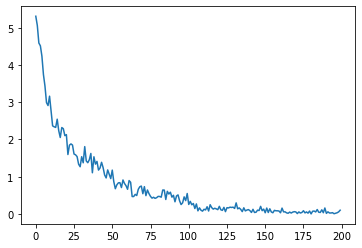

In [1037]:
plt.plot(epoch_loss)

In [1038]:
#check if the dataset is balanced
counts = np.unique(lfw_ds.y, return_counts=True)[1]
counts

array([77, 77, 77, 77, 77, 77, 75])

In [1039]:
accuracy_score(lbls_test, preds_test)

0.9907407407407407

In [1040]:
np.unique(lbls_test, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6.]), array([20, 18, 13, 17, 11, 17, 12]))

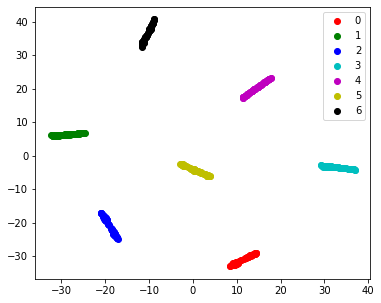

In [1041]:
#visualzing the embeddings with tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(extracted_embs.detach().numpy())
y = extracted_lbls.detach().numpy()
target_ids = range(len(np.unique(y)))
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown'
for i, c, label in zip(target_ids, colors, np.unique(y)):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()



In [1042]:
def predict(model, image, extracted_lbls, extracted_embs, k=1, device='cpu'):
    model.to(device)
    model.eval()
    with torch.no_grad():
        image = torch.tensor(image).type(torch.FloatTensor).to(device)
        anc_output = model(image)
        results = get_topK_similar(extracted_embs, extracted_lbls, anc_output, k)
    return results.squeeze()

new_face = LFWDataset.lfw_image_converter('/home/ubuntu/projects/warmup/final_project/openset.jpeg')
new_face = new_face[np.newaxis,np.newaxis,:,:]
new_face.shape
predict(model, new_face, extracted_lbls, extracted_embs, k=5, device=device)

array([1, 1, 1, 1, 1])

In [1044]:
## checking the sensitivity of the model to number of samples per class
acc = []
min_faces_per_persons = []
num_classes = []
epochs = 100
embedding_size = 128
for min_faces_per_person in range(5, 101, 5): 
    lfw_ds = LFWDataset(min_faces_per_person=min_faces_per_person)
    lfw_ds.add_new_images('/home/ubuntu/projects/warmup/final_project/data/')
    train_ds, test_ds = random_split(lfw_ds, [int(0.8 * len(lfw_ds)), len(lfw_ds)-int(0.8 * len(lfw_ds))])
    # define model, train_loader, criterion, optimizer, epochs=10, device='cpu'
    model = CNN(num_classes=embedding_size)
    train_loader = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)
    criterion = nn.TripletMarginLoss(margin=5.0, p=2)
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.002)
 
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # train the model
    epoch_loss, model = train(model, train_loader, criterion, optimizer, epochs, device)

    # # # define the test loader and test the model
    extracted_lbls, extracted_embs = emb_extractor(model, train_loader, device='cpu')

    test_loader = torch.utils.data.DataLoader(test_ds, batch_size=1, shuffle=False)
    lbls_test, preds_test = test(model, test_loader, extracted_lbls, extracted_embs, device, k=5)
    acc.append(accuracy_score(lbls_test, preds_test))
    # confusion_matrix(lbls_test, preds_test)

100%|██████████| 100/100 [00:16<00:00,  6.02it/s]


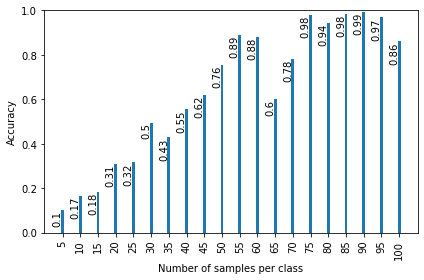

In [1045]:
plt.bar(range(5, 101, 5), acc)
plt.xticks(range(5, 101, 5), range(5, 101, 5), rotation=90)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Number of samples per class')
for i in range(5, 101, 5):
    plt.text(i, acc[i//5-1], round(acc[i//5-1], 2), rotation=90, ha='right', va='top')
plt.tight_layout()
plt.show()

## checking the performance of the model with different embedding sizes

In [1046]:
acc = []
min_faces_per_persons = []
num_classes = []
epochs = 100
embedding_size = 5
for min_faces_per_person in range(5, 101, 5): 
    lfw_ds = LFWDataset(min_faces_per_person=min_faces_per_person)
    lfw_ds.add_new_images('/home/ubuntu/projects/warmup/final_project/data/')
    train_ds, test_ds = random_split(lfw_ds, [int(0.8 * len(lfw_ds)), len(lfw_ds)-int(0.8 * len(lfw_ds))])
    # define model, train_loader, criterion, optimizer, epochs=10, device='cpu'
    model = CNN(num_classes=embedding_size)
    train_loader = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)
    criterion = nn.TripletMarginLoss(margin=5.0, p=2)
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.002)
 
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # train the model
    epoch_loss, model = train(model, train_loader, criterion, optimizer, epochs, device)

    # # # define the test loader and test the model
    extracted_lbls, extracted_embs = emb_extractor(model, train_loader, device='cpu')

    test_loader = torch.utils.data.DataLoader(test_ds, batch_size=1, shuffle=False)
    lbls_test, preds_test = test(model, test_loader, extracted_lbls, extracted_embs, device, k=5)
    acc_temp = accuracy_score(lbls_test, preds_test)
    print(acc_temp)
    acc.append(acc_temp)

100%|██████████| 100/100 [00:51<00:00,  1.96it/s]


0.09669811320754718


100%|██████████| 100/100 [00:38<00:00,  2.61it/s]


0.18238993710691823


100%|██████████| 100/100 [00:36<00:00,  2.75it/s]


0.18213058419243985


100%|██████████| 100/100 [00:30<00:00,  3.27it/s]


0.1626984126984127


100%|██████████| 100/100 [00:26<00:00,  3.82it/s]


0.2930232558139535


100%|██████████| 100/100 [00:26<00:00,  3.72it/s]


0.38571428571428573


100%|██████████| 100/100 [00:21<00:00,  4.69it/s]


0.5371428571428571


100%|██████████| 100/100 [00:20<00:00,  4.94it/s]


0.5304878048780488


100%|██████████| 100/100 [00:16<00:00,  5.96it/s]


0.5555555555555556


100%|██████████| 100/100 [00:16<00:00,  5.98it/s]


0.6592592592592592


100%|██████████| 100/100 [00:13<00:00,  7.34it/s]


0.7363636363636363


100%|██████████| 100/100 [00:13<00:00,  7.47it/s]


0.8611111111111112


100%|██████████| 100/100 [00:14<00:00,  6.68it/s]


0.5132743362831859


100%|██████████| 100/100 [00:14<00:00,  6.74it/s]


0.7982456140350878


100%|██████████| 100/100 [00:13<00:00,  7.53it/s]


0.8796296296296297


100%|██████████| 100/100 [00:15<00:00,  6.43it/s]


0.976


100%|██████████| 100/100 [00:15<00:00,  6.52it/s]


0.9285714285714286


100%|██████████| 100/100 [00:15<00:00,  6.62it/s]


0.9606299212598425


100%|██████████| 100/100 [00:14<00:00,  6.67it/s]


0.8515625


100%|██████████| 100/100 [00:16<00:00,  6.06it/s]


0.875968992248062


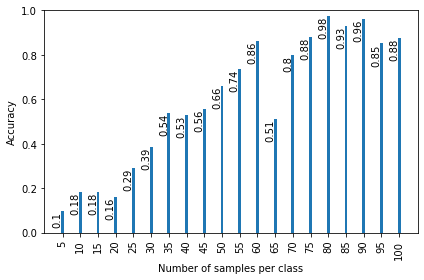

In [1047]:
plt.bar(range(5, 101, 5), acc)
plt.xticks(range(5, 101, 5), range(5, 101, 5), rotation=90)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Number of samples per class')
for i in range(5, 101, 5):
    plt.text(i, acc[i//5-1], round(acc[i//5-1], 2), rotation=90, ha='right', va='top')
plt.tight_layout()
plt.show()